<a href="https://colab.research.google.com/github/DDORINY/study_AI_26/blob/main/04_02_%ED%99%95%EB%A5%A0%EC%A0%81%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# [오늘 노트북이 다루는 한 줄 요약]

# 확률적 경사하강법(SGD)은 “조금씩(점진적으로) 학습”할 수 있고,
# 에포크 수에 따라 과소/과대적합이 발생하므로 적절한 반복 수(early stopping 관점)가 중요하다.

In [ ]:
# MBC 마켓에 럭키백 성공으로 인해서 각각의 지역에서 수산물을 제공하기로 하였다.

# 영업팀은 매주 7개의 생선 중에서 일부를 무작위로 골라
# 머신러닝 모델을 학습할 수 있게 훈련데이터를 제공하고 있다.
# 하지만, 수산물을 제공한다는 곳이 너무 많아서
# 샘플을 골라내는 일이 너무 힘들다. 추가되는 수산물의 샘플도 없다.

# 영업팀은 새로운 생선이 도착하는 대로 가능한 즉시 훈련 데이터를 제공해야 한다.

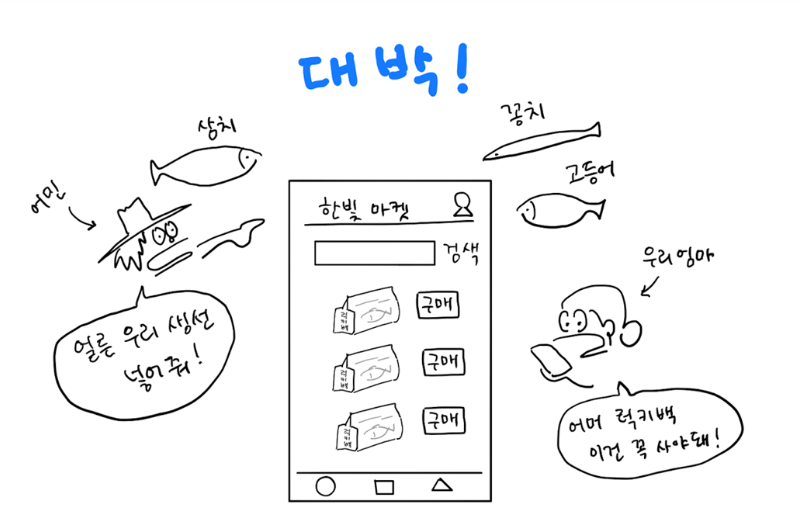

In [1]:
# [점진적 학습]

# 당면한 문제 : 훈련데이터가 한 번에 준비되는 것이 아니라, 조금씩 전달된다.
#----------------------------------------------------------------------------------------------------------------
# 해결법 1 : 기존의 훈련데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련
# 기존 데이터 + 새 데이터 → 전체 다시 학습

# 장점 : 항상 전체 데이터 기반, 정확도 높을 수 있음

# 단점 : 시간이 지날수록 데이터가 늘어난다. -> 인력추가, 서버증설, 시간적 여유가 줄어든다. | 지속이 가능할까?
# 👉 빅데이터 환경에서는 비현실적
#----------------------------------------------------------------------------------------------------------------
# 해결법 2 : 새로운 데이터를 추가할 때마다 이전 데이터를 버린다. 훈련데이터 크기를 일정하게 유지하는 방법
# 최근 데이터 N개만 유지

# 장점 : 메모리 일정, 속도 빠름

# 단점 : 데이터를 버릴때 다른 데이터에 없는 중요한 생선 테이가 포함된다면? 👉 “망각 문제”
#----------------------------------------------------------------------------------------------------------------
# 해결법 3 : 점진적 학습방법
# 기존 모델 유지 → 새 데이터로 가중치 조금 업데이트
# 온라인 학습, 훈련한 모델을 버리지 않고 조금씩 더 새로운 데이터 학습
# -> 확률적 경사 하강법

# 모델을 다시 만들지 않고, 기존 가중치에서 계속 수정

In [ ]:
# 확률적 경사 하강법 (실제 산에서 내려오는 것처럼 가파른 길을 찾아 천천히 조금씩 내려옴)
# 확률적 : 무작위, 랜덤 (훈련세트에서 랜덤하게 하나의 샘플을 고름)
# 경사 : 기울기
# 하강 : 내려가는
# 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려감
# 위 방법을 반복수행
# 만약 모든 샘플을 다 사용해도 다 내려오지 못할 경우
# 처음부터 다시 시작함
# 훈련세트에 모든 샘플을 다시 채워 넣음
# 다시 랜덤하게 하나의 샘플을 선택하여 이어서 경사를 내려감
# 만족할만한 위치에 도달 할 때까지 계속 내려감
# 훈련세트를 한 번 모두 사용하는 과정을 에포크(epoch)라고 함
# 일반적인 경사하강법은 수십, 수백번 이상 에포크를 수행함
# 만약 실제로 등산이라고 가정하고 산에서 내려온다고 생각했을 때 집으로 돌아가려면
# 등산로의 입구까지 내려가야 한다.
# 만약 어떤 산길도 척척 내려갈 수 있는 초능력이 있다면 가장 빠른 길을 선택하는 것이 최선임
# 가장 빠른 길은 경사가 가장 가파른 길!!

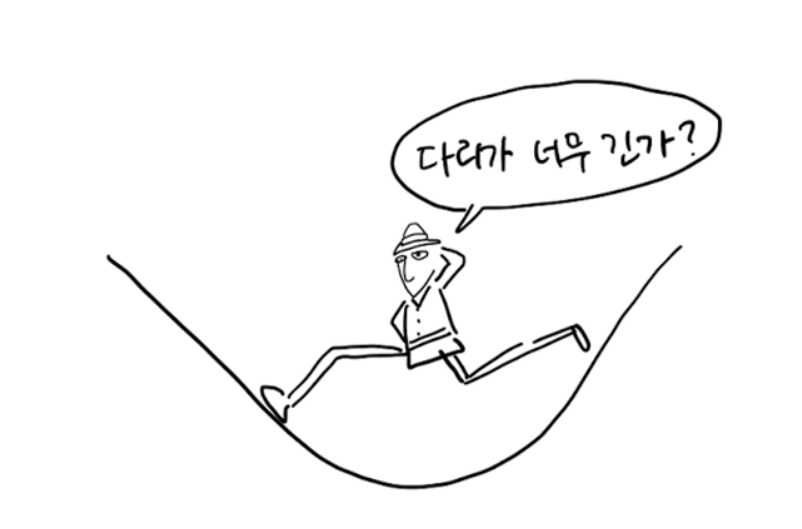

In [ ]:
# 경사 하강법의 본질 : 손실함수(loss)를 최소화하는 가중치를 찾는 것

# 산 위 = 손실이 큰 상태
# 산 아래 = 손실이 작은 상태
# 기울기 = 내려가는 방향 정보

# “확률적”의 진짜 의미 (훈련 세트에서 랜덤하게 하나의 샘플을 선택)
# ->전체 데이터 평균 gradient 대신, 하나의 샘플 gradient로 근사한다

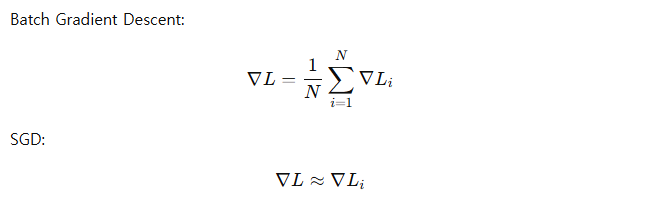

In [ ]:
# 👉 계산량을 줄이는 대신 약간의 노이즈 허용

In [ ]:
# 실제로 산에서 내려올 때는 천천히 조금 씩 내려와야한다. -> 경사 하강법
# 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요함 -> 훈련법
# 훈련세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 가장 가파른 길을 찾을 것!
# 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾음
# -> 확룰적
# 결론 : 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려간 다음 훈련세트에서
# 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려감 -> 전체 샘플을 모두 사용할 때까지 진행

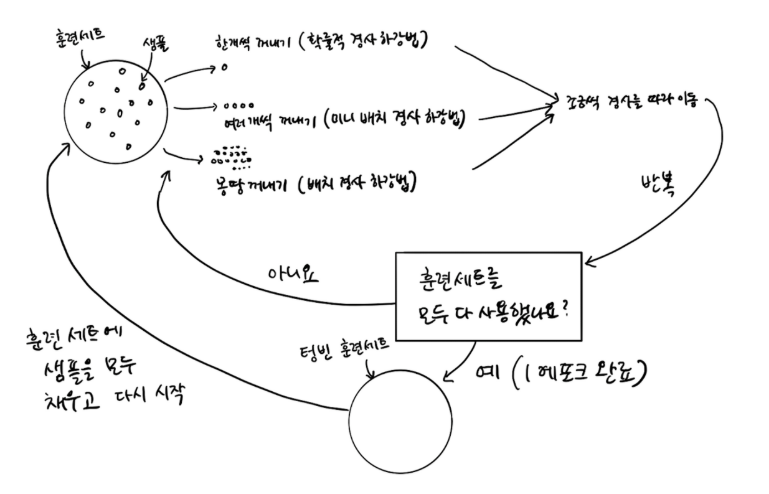

In [ ]:
# 위 방법대로 샘플 1개를 이용하면 너무 무책임하게 내려갈 수 있다.
# 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.
# 이러한 문제점을 해소하려고 무작위로 몇개의 샘플을 선택해서 경사를 내려간다면
# 미니 배치 경사하강법 : 여러개의 샘플을 사용해서 경사하강진행
# 배치 경사 하강법 : 극단적으로 한 번 경사를 따라 이동 (전체 샘플 사용)
# 단점 : 컴퓨터 자원을 너무 많이 사용한다.
# 한번에 전체 데이터를 모두 읽을 수 없을 수 있다.

# 확률적 경사 하강법은 훈련세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동
# 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 이어나갈 수 있다.
# 다시 산꼭대기 부터 시작할 필요가 없다 -> 신경망 알고리즘을 사용한다.

# 손실함수 (Loss function)
# > 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준(작을수록 좋음)
# > 하지만 어떤 값이 최소값인 알지 못함
# > 가능한 많이 찾아보고 만족할 만한 수준이면 인정해야 함
# > 이 값을 찾아서 조금씩 이동

# 손실 함수 공식 : loss = -log(p) -> P = 모델이 '1'이라고 예측한 확률

# 비용 함수(Cost function)
# > 손실함수의 다른말. (손실함수는 샘플 하나에 대한 손실을 정의)
# > 비용함수는 훈련세트에 있는 모든 샘픙ㄹ에 대한 손실함수의 합

# 분류에서 손실은 정잡을 못 맞히는 것!

# 에포크(epoch : 시대) -> 훈련세트를 한 번 모두 사용하는 과정

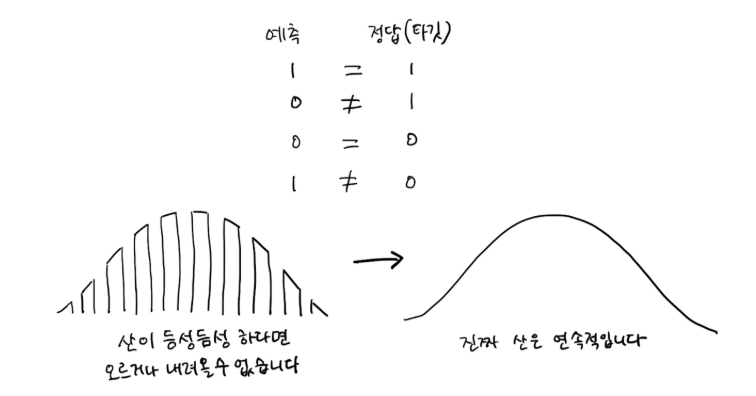

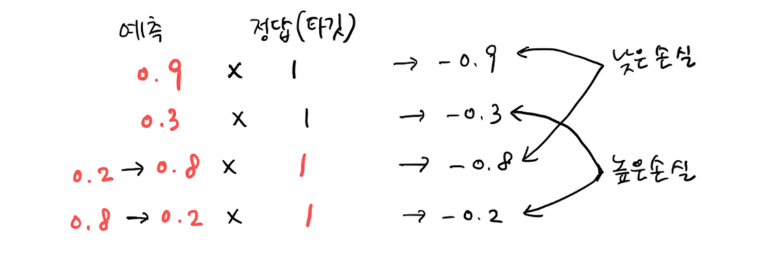

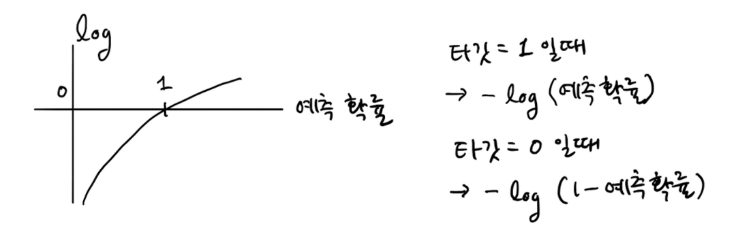

In [ ]:
# 정답이 1인데
# 모델이 높은 확률(0.9,0.8)로 맞추면 -> 손실이 작다
# 모델이 낮은 확률(0.3,0.2)로 맞추면 -> 손실이 크다

# 로그값은 0~1 사이에서 항상 음수이기 때문에
# log(0.9) ≈ -0.1
# log(0.2) ≈ -1.6
# 그래서 손실은 앞에 마이너스를 붙여서 양수로 바꿔줍니다.

In [2]:
 # pandas 라이브러리 불러오기 (데이터 분석용 라이브러리)
import pandas as pd

# 인터넷에 있는 CSV 파일을 읽어와 DataFrame 형태로 저장
# pd.read_csv()는 CSV 파일을 표 형태(행/열 구조)로 변환해준다.
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# head()는 데이터의 위에서부터 기본 5개 행을 출력
# 데이터 구조(컬럼 이름, 값 형태)를 빠르게 확인하기 위해 사용
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
# [왜 read_csv()를 사용하는가?]
# CSV는 데이터 분석에서 가장 많이 사용하는 파일 형식
# 모델 학습 전에 데이터를 불러오는 단계
# pandas DataFrame으로 변환해야 분석이 가능

# [왜 head()를 보는가?]
# AI 분석에서 가장 먼저 하는 일은 데이터 구조 확인
# 확인해야 할 것:
# 컬럼 이름이 무엇인지
# 타깃 변수(정답)는 무엇인지
# 숫자인지 문자열인지
# 이상한 값은 없는지

In [5]:
# 입력 데이터(X) 생성
# 이 모델이 학습할 특징(Feature)들만 선택
# Species는 정답이므로 제외
# [['col1','col2']] 처럼 대괄호 2개를 쓰면 DataFrame 형태로 선택됨
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

# to_numpy()는 pandas DataFrame을 넘파이 배열로 변환
# scikit-learn 모델은 내부적으로 numpy 배열을 사용하기 때문에 변환하는 것


# 타깃 데이터(y) 생성
# Species 컬럼은 정답(label)에 해당
fish_target = fish['Species'].to_numpy()

# 정답 배열 출력
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
# 왜 이렇게 나누는가?
# 머신러닝 기본 구조: X를 보고 y를 맞추도록 학
# 입력(X) → 모델 → 예측값
#             ↑
#           정답(y)

In [7]:
from sklearn.model_selection import train_test_split  # 데이터 분리 함수

import numpy as np

# 넘파이 출력 형식 설정
np.set_printoptions(precision=6, suppress=True)
# precision=6 → 소수점 6자리까지 출력
# suppress=True → 1e-05 같은 과학적 표기법 대신 일반 숫자 형태로 출력
# (표준점수 변환 결과 확인할 때 보기 편하게 설정)


# train_test_split 함수는 데이터를 훈련용과 테스트용으로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    fish_input,      # 입력 데이터(X)
    fish_target,     # 정답 데이터(y)
    random_state=42  # 랜덤 분할을 고정 (실행할 때마다 동일한 결과 보장)
)

print('train_input')
print(train_input)  # 훈련 입력 데이터 (119개 샘플, 5개 특성)

train_input
[[ 720.       35.       40.6      16.3618    6.09  ]
 [ 500.       45.       48.        6.96      4.896 ]
 [   7.5      10.5      11.6       1.972     1.16  ]
 [ 110.       22.       23.5       5.5225    3.995 ]
 [ 140.       20.7      23.2       8.5376    3.2944]
 [  69.       18.2      20.3       5.2983    2.8217]
 [ 110.       21.       22.5       5.6925    3.555 ]
 [ 620.       34.5      39.7      15.5227    5.2801]
 [ 130.       21.3      22.8       6.384     3.534 ]
 [  85.       20.       21.        5.082     2.772 ]
 [ 685.       36.5      39.       10.881     6.864 ]
 [ 500.       31.       36.2      14.3714    4.8146]
 [ 514.       32.8      34.       10.03      6.018 ]
 [ 200.       23.       25.8      10.3458    3.6636]
 [1000.       44.       46.6      12.4888    7.5958]
 [ 714.       36.       41.5      16.517     5.8515]
 [   8.7      11.3      12.6       1.9782    1.2852]
 [1000.       43.       45.2      11.9328    7.2772]
 [ 110.       20.8      23.1      

In [8]:
print(train_input.shape) # 요소 119개, 특성 5

(119, 5)


In [9]:
print('test_input')
print(test_input) # 테스트 입력 데이터

test_input
[[  78.       18.7      19.4       5.1992    3.1234]
 [  13.4      12.4      13.5       2.43      1.269 ]
 [ 200.       32.3      34.8       5.568     3.3756]
 [ 270.       26.       28.7       8.3804    4.2476]
 [ 150.       23.       24.5       5.2185    3.626 ]
 [1000.       37.       42.6      18.957     6.603 ]
 [   7.       10.6      11.6       1.7284    1.1484]
 [ 180.       25.2      27.9       7.0866    3.906 ]
 [ 188.       24.6      26.2       6.7334    4.1658]
 [1250.       56.       59.7      10.6863    6.9849]
 [ 650.       33.5      38.7      14.4738    5.7276]
 [1000.       40.       43.5      12.354     6.525 ]
 [ 600.       32.       37.2      15.438     5.58  ]
 [ 150.       20.       22.4       8.8928    3.2928]
 [ 700.       35.       40.5      16.2405    5.589 ]
 [ 920.       38.5      44.1      18.0369    6.3063]
 [1000.       43.5      46.       12.604     8.142 ]
 [ 218.       26.5      28.        7.168     4.144 ]
 [ 225.       24.       25.5       

In [10]:
print(test_input.shape) # 40개의 요소와 5개의 특성

(40, 5)


In [13]:
# 훈련용 119개, 5개특성 + 테스트용 40개, 5개의 특성

# 정답리스트를 보자
print('train_target : '+ train_target) # 훈련 정답 119개

['train_target : Bream' 'train_target : Pike' 'train_target : Smelt'
 'train_target : Perch' 'train_target : Parkki' 'train_target : Roach'
 'train_target : Perch' 'train_target : Bream' 'train_target : Perch'
 'train_target : Perch' 'train_target : Perch' 'train_target : Bream'
 'train_target : Perch' 'train_target : Parkki' 'train_target : Perch'
 'train_target : Bream' 'train_target : Smelt' 'train_target : Perch'
 'train_target : Roach' 'train_target : Bream' 'train_target : Pike'
 'train_target : Bream' 'train_target : Pike' 'train_target : Perch'
 'train_target : Parkki' 'train_target : Bream' 'train_target : Perch'
 'train_target : Pike' 'train_target : Bream' 'train_target : Perch'
 'train_target : Parkki' 'train_target : Roach' 'train_target : Perch'
 'train_target : Bream' 'train_target : Roach' 'train_target : Perch'
 'train_target : Bream' 'train_target : Bream' 'train_target : Perch'
 'train_target : Perch' 'train_target : Roach' 'train_target : Pike'
 'train_target : Perc

In [14]:
# 테스트 정답 정답 40개
print(test_target)

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream'
 'Perch' 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Perch' 'Perch' 'Whitefish' 'Smelt' 'Smelt' 'Pike' 'Perch' 'Perch' 'Pike'
 'Bream' 'Perch' 'Roach' 'Roach' 'Parkki' 'Perch']


In [16]:
from sklearn.preprocessing import StandardScaler
# 특성(feature) 값을 표준화(standardization)하는 클래스
# 평균 0, 표준편차 1로 변환해주는 전처리 도구


ss = StandardScaler()

# fit() : 훈련 데이터의 평균과 표준편차를 계산
# ※ 반드시 훈련 세트로만 계산해야 함 (데이터 누수 방지)
ss.fit(train_input)

# transform() : 계산된 평균과 표준편차를 이용해 실제 변환 수행
# (x - 평균) / 표준편차 공식 적용
train_scaled = ss.transform(train_input)

# 테스트 데이터도 동일한 기준(훈련 세트 기준)으로 변환
# 절대 test 세트로 fit 하면 안 됨!
test_scaled = ss.transform(test_input)

# 변환된 값 일부 출력
print(train_scaled[:5])

[[ 0.919658  0.609432  0.810412  1.851949  1.000757]
 [ 0.300412  1.546534  1.453166 -0.469817  0.272917]
 [-1.085854 -1.68647  -1.708486 -1.701598 -2.004476]
 [-0.797341 -0.608802 -0.674869 -0.824806 -0.276315]
 [-0.712899 -0.730625 -0.700927 -0.08023  -0.703387]]


In [17]:
print(test_scaled[:5])

[[-0.887414 -0.918046 -1.030989 -0.904645 -0.807625]
 [-1.069247 -1.50842  -1.543455 -1.588496 -1.938032]
 [-0.544014  0.356414  0.306633 -0.81357  -0.653889]
 [-0.346981 -0.233961 -0.223205 -0.11905  -0.122335]
 [-0.684751 -0.515091 -0.588011 -0.899878 -0.50125 ]]


In [18]:
from sklearn.linear_model import SGDClassifier
# SGDClassifier : 확률적 경사 하강법을 사용하는 선형 분류 모델
# 내부적으로 가중치를 조금씩 업데이트하면서 학습함


# loss='log_loss'
# → 로지스틱 손실 함수 사용 (로지스틱 회귀와 동일)
# → 확률 기반 분류 모델

# max_iter=10
# → 에포크(epoch) 수
# → 전체 훈련 세트를 10번 반복해서 학습

# random_state=42
# → 내부 셔플(random) 결과 고정 (재현성 확보)

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)


# fit() : 모델 학습 시작
# train_scaled : 표준화된 입력 데이터
# train_target : 정답(label)
sc.fit(train_scaled, train_target)


# score() : 정확도(accuracy) 반환
# 분류 문제에서는 정확도 = (맞춘 개수 / 전체 개수)
print(sc.score(train_scaled, train_target))  # 훈련 세트 정확도
print(sc.score(test_scaled, test_target))    # 테스트 세트 정확도

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [19]:
# SGD(확률적 경사하강법)은 '점진적(온라인) 학습'이 가능
# 즉, 모델(sc)을 새로 만들지 않고 기존 모델의 가중치를 유지한 채로
# 추가 데이터(또는 같은 데이터)를 이용해 계속 업데이트할 수 있다.

# partial_fit() : 모델을 '부분적으로' 한 번 더 학습(추가 학습)
# - 내부적으로 가중치(w)를 현재 값에서 계속 업데이트
# - train_scaled 전체를 한 번 더 사용하면, 사실상 "에포크를 추가로 1번 더 수행"한 효과에 가까움
sc.partial_fit(train_scaled, train_target)

# score() : 분류 정확도(accuracy) 반환
print(sc.score(train_scaled, train_target))  # 훈련 세트 정확도
print(sc.score(test_scaled, test_target))    # 테스트 세트 정확도

0.7983193277310925
0.775


In [ ]:
# 에포크와 과대/과소적합
# 확률적 경사 하강법를 사용한 모델은 에포크 횟수에 따라 과소,과대 적합이 될 수 있다.
# 에포크 횟수가 적으면 훈련 세트를 덜 학습한다. (119개에서 10번만 랜덤추출하고 정지)
# 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다. (good!)

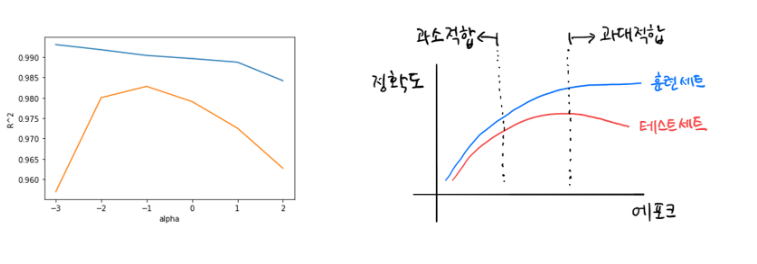

In [ ]:
# 바꾸어 말하면 적은 에포크 횟수 동안에 훈련된 모델은 훈련세트와 테스트 세트에 맞지 않음(과소적합)
# 반대로 에포크 횟수가 많은 훈련 모델인 경우 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁨(과대적합)

# 과대 적합이 되기전에 훈련을 멈추는 것을 조기 종료!!!!

In [20]:
import numpy as np

# 새로운 SGDClassifier 생성
# max_iter를 쓰지 않고, partial_fit으로 직접 에포크를 제어할 것임
sc = SGDClassifier(loss='log_loss', random_state=42)

# 각 에포크마다의 정확도를 저장할 리스트
train_score = []  # 훈련 세트 정확도 저장
test_score = []   # 테스트 세트 정확도 저장


# partial_fit은 첫 호출 시 classes 인자를 반드시 제공해야 함
# train_target에 존재하는 고유 클래스(7개 생선 종류)를 추출
classes = np.unique(train_target)


# 300번 반복 = 300 에포크
# _ 는 반복 변수지만 사용하지 않기 때문에 관례적으로 사용
for _ in range(0, 300):

    # partial_fit : 모델을 한 에포크씩 추가 학습
    # train_scaled 전체를 한 번 더 학습에 사용
    sc.partial_fit(train_scaled, train_target, classes=classes)

    # 현재 에포크에서의 훈련 정확도 계산
    train_score.append(sc.score(train_scaled, train_target))

    # 현재 에포크에서의 테스트 정확도 계산
    test_score.append(sc.score(test_scaled, test_target))

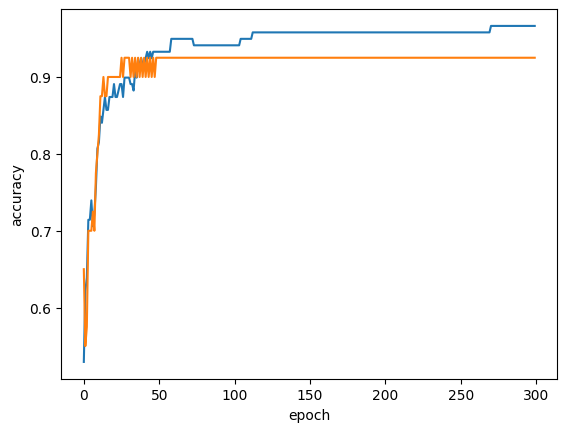

In [21]:
import matplotlib.pyplot as plt  # 그래프를 그리기 위한 matplotlib 라이브러리

# train_score 리스트를 선 그래프로 그림
# x축은 자동으로 0~299 (에포크 횟수)
# y축은 각 에포크에서의 훈련 정확도
plt.plot(train_score)

# test_score 리스트를 같은 그래프에 추가
# 훈련 점수와 비교하기 위해 함께 그림
plt.plot(test_score)

# x축 이름 지정 → 에포크 횟수
plt.xlabel('epoch')

# y축 이름 지정 → 정확도
plt.ylabel('accuracy')

# 그래프 출력
plt.show()

In [22]:
# 에포크를 100으로 설정하여 다시 학습
# max_iter=100 → 전체 훈련 세트를 100번 반복

# tol=None
# → 조기 종료(Early Stopping) 기능 비활성화
# → 지정한 100번을 무조건 모두 수행

sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)

# 모델 학습
sc.fit(train_scaled, train_target)

# 훈련 세트 정확도
print(sc.score(train_scaled, train_target))

# 테스트 세트 정확도
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [23]:
sc.predict(test_scaled[:5])
# ['Perch', 'Smelt', 'Pike', 'Perch', 'Perch']

proba = sc.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.003, 0.774, 0.   , 0.219, 0.   , 0.005],
       [0.   , 0.001, 0.015, 0.   , 0.04 , 0.945, 0.   ],
       [0.   , 0.   , 0.011, 0.96 , 0.02 , 0.008, 0.001],
       [0.   , 0.   , 0.525, 0.   , 0.423, 0.   , 0.052],
       [0.   , 0.   , 0.688, 0.   , 0.306, 0.   , 0.006]])

In [24]:
sc.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype='<U9')

In [ ]:
# 손실함수에 대한 loss 매개변수

# loss 매개값의 기본값은 loss=hinge (힌지 손실) -> 서포트 백터 머신(SVM)이라고 불림
# SVM : 두 클래스를 가장 멀리 떨어지게 나누는 경계를 찾는 알고리즘
# 데이터를 선 하나로 나눈다고 생각해보자 여러 개의 선을 그릴 수 있지만 SVM은 이런 선을 고릅니다
# 두 클래스 사이의 간격(마진)이 가장 넓은 선

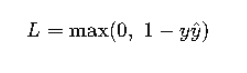

In [25]:
# loss='hinge'
# → 힌지 손실 함수 사용
# → 선형 SVM 방식으로 학습
# → 확률이 아니라 "마진 최대화"가 목표

sc_hinge = SGDClassifier(
    loss='hinge',      # SVM 손실 함수
    max_iter=100,      # 에포크 100번
    tol=None,          # 조기 종료 비활성화
    random_state=42
)

# 학습
sc_hinge.fit(train_scaled, train_target)

# 훈련 정확도
print(sc_hinge.score(train_scaled, train_target))

# 테스트 정확도
print(sc_hinge.score(test_scaled, test_target))

0.9495798319327731
0.925


In [26]:
sc_hinge.predict(test_scaled[:5])  # Perch Smelt Pike Perch Perch
# 단 힌지 손실함수는 predict_proba()를 지원하지 않는다.
# proba = sc_hinge.predict_proba(test_scaled[:5])
# np.round(proba, decimals=3)

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype='<U9')

In [28]:
sc_hinge.partial_fit(train_scaled, train_target)
print(sc_hinge.score(train_scaled, train_target))
print(sc_hinge.score(test_scaled, test_target))

0.907563025210084
0.925


In [29]:
from sklearn.metrics import hinge_loss
# SVM의 손실 함수 값 계산용 (hinge loss)

# 각 epoch(반복 학습)마다 점수와 손실을 저장할 리스트
train_score = []   # 훈련 데이터 accuracy 저장
test_score = []    # 테스트 데이터 accuracy 저장
train_loss = []    # 훈련 데이터 hinge loss 저장
test_loss = []     # 테스트 데이터 hinge loss 저장

# partial_fit에서는 클래스 목록을 반드시 지정해줘야 함
# train_target에 존재하는 모든 클래스 추출
classes = np.unique(train_target)

# SGDClassifier 생성
# loss='hinge' → 선형 SVM 방식 (힌지 손실 사용)
# max_iter=1 → 한 번에 1 epoch만 학습
# tol=None → 조기 종료 비활성화 (우리가 반복 제어할 것)
# random_state=42 → 재현성 고정
sc_hinge_test = SGDClassifier(
    loss='hinge',
    max_iter=1,
    tol=None,
    random_state=42
)

# 300번 반복 → 300 epoch 학습
for _ in range(300):

    # partial_fit:
    # 기존 가중치를 유지한 채 추가 학습
    # classes는 첫 호출 때 반드시 필요
    sc_hinge_test.partial_fit(
        train_scaled,
        train_target,
        classes=classes
    )

    # =========================
    # Accuracy 계산
    # =========================

    # score()는 내부적으로 predict 후 accuracy 계산
    train_score.append(
        sc_hinge_test.score(train_scaled, train_target)
    )

    test_score.append(
        sc_hinge_test.score(test_scaled, test_target)
    )

    # =========================
    # Hinge Loss 계산
    # =========================

    # decision_function:
    # 각 샘플이 결정 경계에서 얼마나 떨어져 있는지 반환
    # (예측 클래스가 아니라 margin 값 반환)
    train_decision = sc_hinge_test.decision_function(train_scaled)
    test_decision = sc_hinge_test.decision_function(test_scaled)

    # hinge_loss(실제값, margin값)
    # margin이 충분히 크면 손실 0
    # margin이 작거나 잘못 분류되면 손실 증가
    train_loss.append(
        hinge_loss(train_target, train_decision)
    )

    test_loss.append(
        hinge_loss(test_target, test_decision)
    )

In [ ]:
# Accuracy 정의 : "전체 중에서 몇 개를 맞췄는가?"

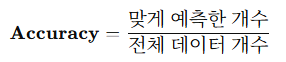

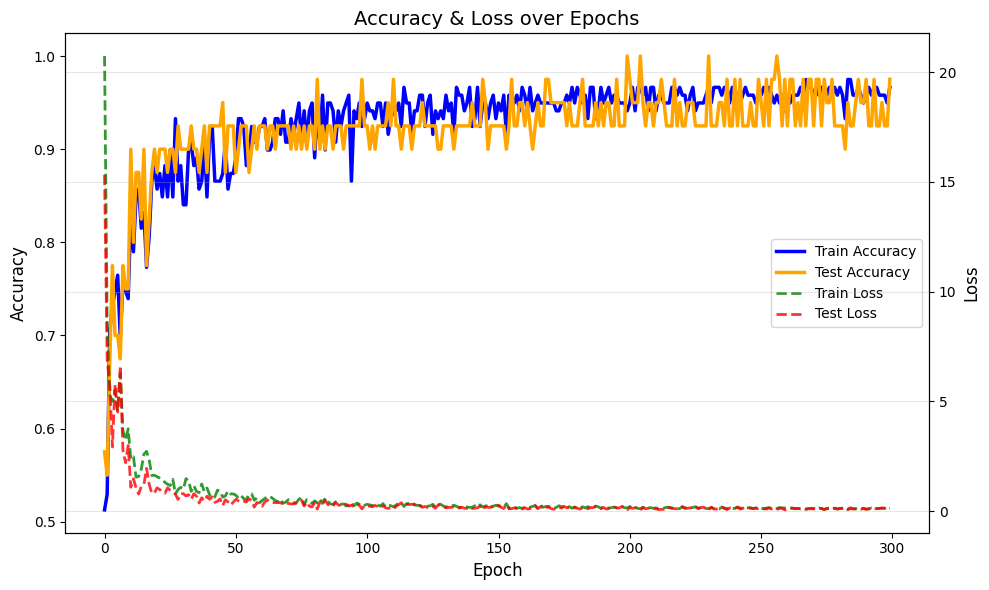

In [30]:
# Figure와 첫 번째 y축(ax1) 생성
# figsize=(10,6) → 가로 10인치, 세로 6인치
fig, ax1 = plt.subplots(figsize=(10,6))


# ==============================
# Accuracy (왼쪽 y축)
# ==============================

# 훈련 정확도 그래프
ax1.plot(
    train_score,          # epoch별 train accuracy
    color='blue',         # 선 색상
    linewidth=2.5,        # 선 두께
    label='Train Accuracy'
)

# 테스트 정확도 그래프
ax1.plot(
    test_score,           # epoch별 test accuracy
    color='orange',
    linewidth=2.5,
    label='Test Accuracy'
)

# x축 레이블 설정
ax1.set_xlabel('Epoch', fontsize=12)

# 왼쪽 y축 레이블 설정
ax1.set_ylabel('Accuracy', fontsize=12)

# y축 눈금 스타일 설정
ax1.tick_params(axis='y')


# ==============================
# Loss (오른쪽 y축)
# ==============================

# twinx() → 같은 x축을 공유하는 두 번째 y축 생성
# Accuracy와 Loss의 스케일이 다르기 때문에 필요
ax2 = ax1.twinx()

# 훈련 손실 그래프
ax2.plot(
    train_loss,           # epoch별 train hinge loss
    color='green',
    linestyle='--',       # 점선
    linewidth=2,
    alpha=0.8,            # 투명도
    label='Train Loss'
)

# 테스트 손실 그래프
ax2.plot(
    test_loss,
    color='red',
    linestyle='--',
    linewidth=2,
    alpha=0.8,
    label='Test Loss'
)

# 오른쪽 y축 레이블 설정
ax2.set_ylabel('Loss', fontsize=12)


# ==============================
# 범례(legend) 합치기
# ==============================

# ax1과 ax2는 서로 다른 축이기 때문에
# legend를 각각 호출하면 따로 생성됨

# 그래서 두 축의 line과 label을 가져와서 합쳐야 함
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# 합쳐서 한 번에 표시
ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='center right'
)


# ==============================
# 기타 설정
# ==============================

plt.title('Accuracy & Loss over Epochs', fontsize=14)

# 격자 표시 (투명도 0.3)
plt.grid(alpha=0.3)

# 레이아웃 자동 정렬 (겹침 방지)
plt.tight_layout()

# 그래프 출력
plt.show()

In [ ]:
# 조기종료 지점 찾아보기 (Early Stopping)
# test loss가 가장 낮은 epoch 또는 test loss가 patience 횟수만큼 연속 증가하면 멈춤
# minL(test) : test loss가 더 이상 감소하지 않는 시점을 찾습니다.

In [31]:
# ===============================
# Early Stopping 초기 설정
# ===============================

patience = 10
# 손실이 개선되지 않아도 기다려줄 epoch 수

best_loss = float('inf')
# 지금까지 관찰한 최소 test loss
# 처음엔 무한대로 설정

patience_counter = 0
# 손실 개선이 안 된 횟수 카운트

early_stop_epoch = 0
# 가장 좋은 성능을 보인 epoch 저장


# ===============================
# 기록용 리스트
# ===============================

train_score_early = []
test_score_early = []
train_loss_early = []
test_loss_early = []


# ===============================
# 모델 생성
# ===============================

sc_hinge_test_early = SGDClassifier(
    loss='hinge',
    max_iter=1,
    tol=None,
    random_state=42
)

# ===============================
# 학습 루프
# ===============================

for epoch in range(300):

    # 1 epoch만 추가 학습
    sc_hinge_test_early.partial_fit(
        train_scaled,
        train_target,
        classes=classes
    )

    # ----------------------------
    # Accuracy 계산
    # ----------------------------

    train_score_early.append(
        sc_hinge_test_early.score(train_scaled, train_target)
    )

    test_score_early.append(
        sc_hinge_test_early.score(test_scaled, test_target)
    )

    # ----------------------------
    # Loss 계산
    # ----------------------------

    # decision_function → margin 값
    train_decision = sc_hinge_test_early.decision_function(train_scaled)
    test_decision = sc_hinge_test_early.decision_function(test_scaled)

    # test loss 계산 (Early Stopping 기준)
    current_test_loss = hinge_loss(test_target, test_decision)

    train_loss_early.append(
        hinge_loss(train_target, train_decision)
    )

    test_loss_early.append(current_test_loss)

    # ----------------------------
    # Early Stopping 로직
    # ----------------------------

    # 손실이 더 좋아졌다면 (감소했다면)
    if current_test_loss < best_loss:

        best_loss = current_test_loss
        # 최소 손실 갱신

        patience_counter = 0
        # 개선됐으므로 카운터 초기화

        early_stop_epoch = epoch
        # 현재 epoch이 가장 좋음

    else:
        # 개선되지 않았다면
        patience_counter += 1

    # patience 횟수만큼 개선이 없으면 중단
    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

Early stopping at epoch 23


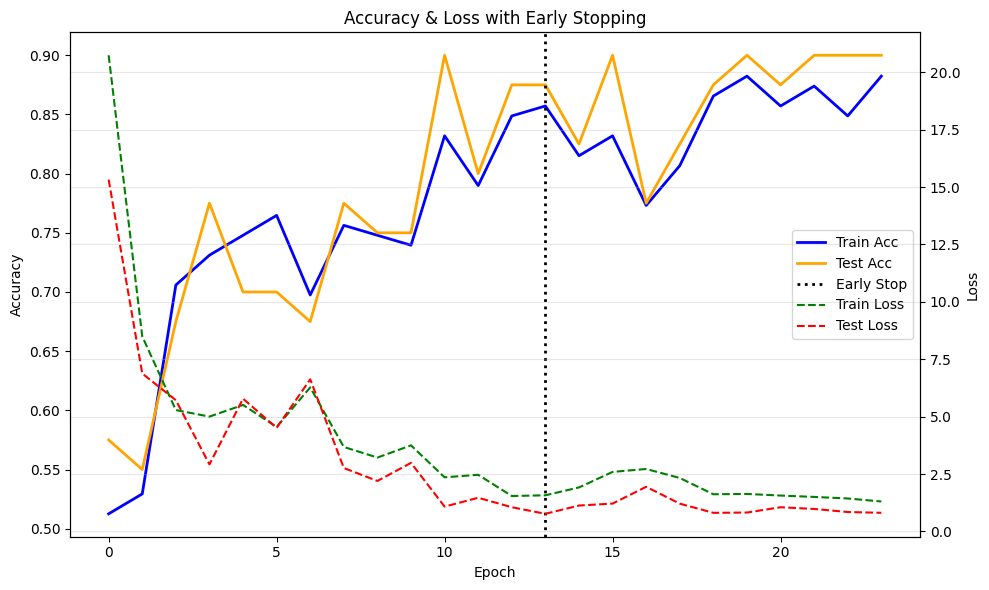

In [32]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Accuracy
ax1.plot(train_score_early, color='blue', linewidth=2, label='Train Acc')
ax1.plot(test_score_early, color='orange', linewidth=2, label='Test Acc')

# Early stopping 세로선
ax1.axvline(x=early_stop_epoch,
            color='black',
            linestyle=':',
            linewidth=2,
            label='Early Stop')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')

# Loss
ax2 = ax1.twinx()
ax2.plot(train_loss_early, color='green', linestyle='--', label='Train Loss')
ax2.plot(test_loss_early, color='red', linestyle='--', label='Test Loss')
ax2.set_ylabel('Loss')

# 범례 통합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

plt.title('Accuracy & Loss with Early Stopping')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()